<a href="https://colab.research.google.com/github/rukayah/experimental_analysis/blob/main/Solution_123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The data contains an experiment of 2 groups - control and treatment. Treatment group has a new landing page. Find out whether there's a significant difference in conversion rate between two groups, under 95% confidence.

#Import Packages



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('/content/ab_data.csv')
data.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [ ]:
data.shape

(294478, 5)

In [ ]:
print(data['group'].value_counts())
print(data['landing_page'].value_counts())
print(data['converted'].value_counts())

treatment    147276
control      147202
Name: group, dtype: int64
old_page    147239
new_page    147239
Name: landing_page, dtype: int64
0    259241
1     35237
Name: converted, dtype: int64


conversion rate mean how many people that visited your page are you able to make your customer. so if 100 people visited your page and 2 people signed up , then conversion rate is 2%

In [ ]:
#Unit of diversion = user_id
#coversion means they actually move through the landing page
#p_control_converted = converted[1] / data[control]
#p_treatment_converted =             /data[treatment]
#Count no of conversion for treatment
#count no of conversion for control
#calculate standard error

Treatment group are exposed to the new page
contol group are exposed to the old page

we need to group by group and landing page

In [ ]:
pd.crosstab(data['group'], data['landing_page'])

landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145311,1965


Check for sessional count in user_id and drop them

In [ ]:
session_counts = data['user_id'].value_counts(ascending=False)
multi_users = session_counts[session_counts > 1].count()
print(multi_users)



3894


In [ ]:
#drop this users to make sure they must have been expose to one page
drop = session_counts[session_counts > 1].index
data = data[~data['user_id'].isin(drop)]
print(data.shape[0])

286690


In [ ]:
# we need to reaffirm our data
pd.crosstab(data['group'], data['landing_page'])

landing_page,new_page,old_page
group,,
control,0,143293
treatment,143397,0


In [ ]:
#We can make a sample for the data but i would just go with the whole data even though they are not equal, they are similar 
# and can be used.
data['group'].value_counts() 


treatment    143397
control      143293
Name: group, dtype: int64

In [ ]:
conversion_rates = data.groupby('group')['converted']
conversion_rates = conversion_rates.agg([np.mean])
conversion_rates.columns = ['conversion_rate']

In [ ]:
conversion_rates
# The conversion rate does not make any difference in the two group.

,conversion_rate
group,
control,0.120173
treatment,0.118726


Text(0, 0.5, 'Converted (proportion)')

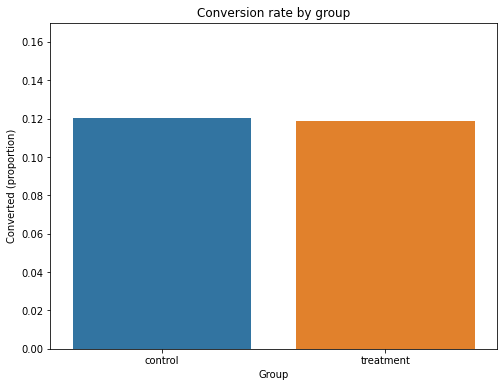

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['group'], y=data['converted'], ci=False)

plt.ylim(0, 0.17)
plt.title('Conversion rate by group')
plt.xlabel('Group')
plt.ylabel('Converted (proportion)')

Test for significant
Hₒ: p = pₒ

Hₐ: p ≠ p

p is the conversion rate of new page
pₒ is the conversion rate of old page

In [ ]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

control_results = data[data['group'] == 'control']['converted']
treatment_results = data[data['group'] == 'treatment']['converted']
n_con = control_results.count()
n_treat = treatment_results.count()
successes = [control_results.sum(), treatment_results.sum()]
nobs = [n_con, n_treat]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'Confident interval 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'Confident interval  95% for treatment group: [{lower_treat:3f}, {upper_treat:.3f}]')

z statistic: 1.19
p-value: 0.232
Confident interval 95% for control group: [0.118, 0.122]
Confident interval  95% for treatment group: [0.117052, 0.120]


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


since our p-value is above our  α=0.05 threshold, We cannot reject the Null hypothesis which means that our new design is the same with the old one.